In [1]:
import os
import time
import torch
import math
import torchvision
from torchvision import transforms as transforms
from torch import nn
from torch.nn import functional as F
from math import cos,pi

import matplotlib.pyplot as plt
import numpy as np
import random

torch.cuda.empty_cache()

In [2]:
torch.cuda.is_available()

True

In [3]:
# torch.manual_seed(17)

# class HaS(object): 
# #     def __init__(self):
        
#     def __call__(self, img):
#         # get width and height of the image
#         img_= np.array(img).copy()
#         s = img_.shape
#         wd = s[0]
#         ht = s[1]

#         # possible grid size, 0 means no hiding
#         grid_size=3

#         # hiding probability
#         hide_prob = 0.1
 
#         # randomly choose one grid size
# #         grid_size= grid_sizes[random.randint(0,len(grid_sizes)-1)]

#         # hide the patches
#         if(grid_size>0):
#              for x in range(0,wd,grid_size):
#                  for y in range(0,ht,grid_size):
#                      x_end = min(wd, x+grid_size)  
#                      y_end = min(ht, y+grid_size)
#                      if(random.random() <=  hide_prob):
#                            img_[x:x_end,y:y_end,:]=0

#         return img_
    
# torch.manual_seed(17)

        
# class HideEdge(object): 
#     def __init__(self,hide_size):
#         self.hide_size=hide_size
        
#     def __call__(self, img):
#         # get width and height of the image
#         img_= np.array(img).copy()
#         s = img_.shape
#         wd = s[0]
#         ht = s[1]

#         hide_size=self.hide_size
        
# #         img_[:,:,:] = img()
   
#         x_end = wd - hide_size 
#         y_end = ht - hide_size

#         img_[x_end:,y_end:,:]=0
# #         img_[x_end:,:hide_size,:]=0
# #         img_[:hide_size,y_end:,:]=0
#         img_[:hide_size,:hide_size,:]=0
# #         img_[x_end:,:,:]=0
# #         img_[:,y_end:,:]=0
# #         img_[:hide_size,:,:]=0
# #         img_[:,:hide_size,:]=0
# #         print(img_[x_end,y_end,:])
# #         print(img_[hide_size,hide_size,:])
# #         print(x_end,y_end,hide_size)
        
# #         mean = img_[hide_size:x_end-1,hide_size:y_end,:].mean()
# #         std = img_[hide_size:x_end-1,hide_size:y_end,:].std()
# #         print(mean, std)
# #         img_[hide_size:x_end-1,hide_size:y_end,:] = (img_[hide_size:x_end-1,hide_size:y_end,:] - mean) / std
# #         print(img_[hide_size:x_end-1,hide_size:y_end,:])
        
#         return img_

   
# class Hide_after_Norm(object): 
#     def __init__(self,hide_size):
#         self.hide_size=hide_size
        
#     def __call__(self, img_):
#         # get width and height of the image
# #         img_= np.array(img).copy()
#         s = img_.shape
#         wd = s[1]
#         ht = s[2]

#         hide_size=self.hide_size
        
# #         img_[:,:,:] = img()
   
#         x_end = wd - hide_size 
#         y_end = ht - hide_size
        
#         x_end = wd - hide_size 
#         y_end = ht - hide_size

#         img_[:,x_end:,y_end:]=0
# #         img_[x_end:,:hide_size,:]=0
# #         img_[:hide_size,y_end:,:]=0
#         img_[:,:hide_size,:hide_size]=0
# #         print(img_[x_end,y_end,:])
# #         print(img_[hide_size,hide_size,:])
# #         print(x_end,y_end,hide_size)
        
# #         mean = img_[hide_size:x_end-1,hide_size:y_end,:].mean()
# #         std = img_[hide_size:x_end-1,hide_size:y_end,:].std()
# #         print(mean, std)
# #         img_[hide_size:x_end-1,hide_size:y_end,:] = (img_[hide_size:x_end-1,hide_size:y_end,:] - mean) / std
# #         print(img_[hide_size:x_end-1,hide_size:y_end,:])
        
#         return img_
    
    

# # torch.cuda.manual_seed(17) # for GPU
# aug_train = transforms.Compose([
#     transforms.RandomHorizontalFlip(), # 水平翻转
# #     torchvision.transforms.CenterCrop(26),
# #     HideEdge(),
#     torchvision.transforms.RandomRotation(15),
# #     torchvision.transforms.CenterCrop(28),
#     # transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5), # color aug
# #     transforms.RandomCrop(32, padding=4), # 裁剪
#     # transforms.RandomResizedCrop((32,32),scale=(0.1,1),ratio=(0.5,2))
# #     hide_patch(),
# #     HaS(),
# #     HideEdge(2),
#     transforms.ToTensor(),
# #     Norm(2),
#     transforms.Normalize((0.4649, 0.4553, 0.4214), (0.2271, 0.2234, 0.2208)),# normalization
#     Hide_after_Norm(2)
#     ])

# aug_test = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize((0.4649, 0.4553, 0.4214), (0.2271, 0.2234, 0.2208)), # normalization
#     Hide_after_Norm(2)
#     ])

# trainingdata = torchvision.datasets.CIFAR10('./CIFAR10',train=True,download=True,transform=aug_train)
# # testdata = torchvision.datasets.CIFAR10('./CIFAR10',train=False,download=True,transform=transforms.ToTensor())
# # print(len(trainingdata),len(testdata))

In [4]:
torch.manual_seed(17)
torch.cuda.manual_seed_all(17)

aug_train = transforms.Compose([
    transforms.RandomCrop(32,padding=4,padding_mode='reflect'),
    transforms.RandomHorizontalFlip(), # 水平翻转
    transforms.ToTensor(),
    transforms.Normalize((0.4244, 0.4146, 0.3836), (0.2539, 0.2491, 0.2420)) # normalization
    ])

aug_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4244, 0.4146, 0.3836), (0.2539, 0.2491, 0.2420)) # normalization
    ])

trainingdata = torchvision.datasets.CIFAR10('./CIFAR10',train=True,download=True,transform=aug_train)

Files already downloaded and verified


In [5]:
def load_data(is_train,aug,batch_size):
    dataset = torchvision.datasets.CIFAR10('./CIFAR10',train=is_train,download=True,transform=aug)
    dataloader = torch.utils.data.DataLoader(dataset,batch_size=batch_size,shuffle=is_train)
    return dataloader

batch_size = 128 # param
trainDataLoader = load_data(is_train=True,aug=aug_train,batch_size=batch_size)
testDataLoader = load_data(is_train=False,aug=aug_test,batch_size=batch_size)

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 32, 32]) 6


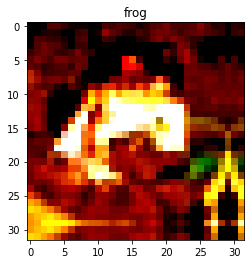

In [6]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

image,label = trainingdata[0]
print(image.shape, label)

%matplotlib inline
plt.imshow(image.numpy().transpose(1,2,0))
plt.title(str(classes[label]))
plt.show()

In [7]:
class BasicBlock(nn.Module):

    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()
        if in_planes == 64:
            self.conv1 = nn.Conv2d(
                in_planes, planes, kernel_size=5, stride=stride, padding=1, bias=False)
            self.bn1 = nn.BatchNorm2d(planes)
            self.conv2 = nn.Conv2d(planes, planes, kernel_size=3,
                               stride=1, padding=1, bias=False)
            self.bn2 = nn.BatchNorm2d(planes)
        else:
            self.conv1 = nn.Conv2d(
                in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
            self.bn1 = nn.BatchNorm2d(planes)
            self.conv2 = nn.Conv2d(planes, planes, kernel_size=3,
                               stride=1, padding=1, bias=False)
            self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if in_planes == 64:
             self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, planes,
                          kernel_size=3, stride=stride, bias=False),
                nn.BatchNorm2d(planes)
                )
        elif stride != 1 or in_planes != planes:
            if in_planes == 128:
                self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, planes,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes)
                )
            else:
                self.shortcut = nn.Sequential(
                    nn.Conv2d(in_planes, planes,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes)
                )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out



class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10):
        super(ResNet, self).__init__()
        self.in_planes = 64

        self.conv1 = nn.Conv2d(3, 64, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
#         self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
        self.linear = nn.Linear(256, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes
        return nn.Sequential(*layers)

    def forward(self, x):
#         print(x.shape)
        out = F.relu(self.bn1(self.conv1(x)))
#         print(out.shape)
        out = self.layer1(out)
#         print(out.shape)
        out = self.layer2(out)
#         print(out.shape)
        out = self.layer3(out)
#         print(out.shape)
#         out = self.layer4(out)
        out = F.avg_pool2d(out, 4)
#         print(out.shape)
        out = out.view(out.size(0), -1)
#         print(out.shape)
        out = self.linear(out)
        return out
    
    def init_weights(self):
        for m in self.modules():
            if isinstance(m,nn.Conv2d):
                nn.init.kaiming_normal_(m.weight,mode='fan_out',nonlinearity='relu') # weight initialization
                if m.bias is not None:
                    nn.init.constant_(m.bias,0)
            elif isinstance(m,nn.BatchNorm2d):
                nn.init.constant_(m.weight,1)
                nn.init.constant_(m.bias,0)
            elif isinstance(m,nn.Linear):
                nn.init.normal_(m.weight,std=1e-3)
                if m.bias is not None:
                    nn.init.constant_(m.bias,0)

def project1_model():
#     return ResNet(BasicBlock, [2, 2, 2, 2])
    return ResNet(BasicBlock, [3, 3, 3])

# model1 = nn.Sequential(project1_model(), nn.AdaptiveAvgPool2d((1,1)), nn.Flatten(), nn.Linear(512, 10)).cuda()
model1 = project1_model().cuda()
model1.init_weights()

In [8]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
    # torch.numel() returns number of elements in a tensor

print(count_parameters(model1))

4831946


In [9]:
# X = torch.rand(size=(1, 3, 32, 32)).cuda()
# for layer in model1:
#   X = layer(X)
#   print(layer.__class__.__name__,'output shape:\t', X.shape)

In [10]:
def adjust_learning_rate(optimizer, current_epoch,max_epoch,lr_min=0,lr_max=0.1,warmup=True):
    warmup_epoch = 10 if warmup else 0
    if current_epoch < warmup_epoch:
        lr = lr_max * current_epoch / warmup_epoch
    else:
        lr = lr_min + (lr_max-lr_min)*(1 + cos(pi * (current_epoch - warmup_epoch) / (max_epoch - warmup_epoch))) / 2
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

In [11]:
num_epochs = 500 # param
epoch_start = 0
path = 'batch_128_lr_0.1_no_crop_kernel_5.pt'

train_loss_history = []
test_loss_history = []
train_accuracy_history = []
test_accuracy_history = []

Loss = torch.nn.CrossEntropyLoss()

lr = 0.1
lr_min=0.001
momentum = 0.9
nesterov = True
optimizer = torch.optim.SGD(model1.parameters(),lr=lr,momentum=momentum,nesterov=nesterov)



if os.path.exists(path):
    checkpoint = torch.load(path)
    print('Read model from checkpoint')
    model1.cuda().load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    epoch_start = checkpoint['epoch']
    Loss = checkpoint['Loss']
    train_loss_history = checkpoint['train_loss_history']
    test_loss_history = checkpoint['test_loss_history']
    train_accuracy_history = checkpoint['train_accuracy_history']
    test_accuracy_history = checkpoint['test_accuracy_history']
    print('Restart from epoch',epoch_start)
    

for epoch in range(epoch_start+1, num_epochs+1):
    timestart = time.time()

    train_loss = 0.0
    test_loss = 0.0
    train_accuracy = 0.0
    test_accuracy = 0.0

    for i, data in enumerate(trainDataLoader):
        images, labels = data
        images = images.cuda()
        labels = labels.cuda()
        optimizer.zero_grad()
        predicted_output = model1.cuda()(images)
        fit = Loss(predicted_output,labels)
        fit.backward()
        adjust_learning_rate(optimizer=optimizer,current_epoch=epoch,max_epoch=num_epochs,lr_min=lr_min,lr_max=lr,warmup=True)
        optimizer.step()
        train_loss += fit.item()
        train_accuracy += (torch.eq(torch.max(predicted_output,1)[1],labels).sum()/len(labels)*100).data.cpu().numpy()

    for i, data in enumerate(testDataLoader):
        with torch.no_grad():
            images, labels = data
            images = images.cuda()
            labels = labels.cuda()
            predicted_output = model1.cuda()(images)
            fit = Loss(predicted_output,labels)
            test_loss += fit.item()
            test_accuracy += (torch.eq(torch.max(predicted_output,1)[1],labels).sum()/len(labels)*100).data.cpu().numpy()


    train_loss = train_loss/len(trainDataLoader)
    test_loss = test_loss/len(testDataLoader)
    train_accu = train_accuracy/len(trainDataLoader)
    test_accu = test_accuracy/len(testDataLoader)
    train_loss_history.append(train_loss)
    test_loss_history.append(test_loss)
    train_accuracy_history.append(train_accu)
    test_accuracy_history.append(test_accu)
    print('Epoch %s, Train loss %s, Test loss %s, Train accuracy %s, Test accuracy %s, Cost %s s'%(epoch,
                                                                                                   train_loss,test_loss,
                                                                                                   train_accu,test_accu,
                                                                                                   time.time()-timestart))

    if epoch % 5 == 0 and epoch != 0:
        torch.save({'epoch':epoch,
          'model_state_dict':model1.cuda().state_dict(),
          'optimizer_state_dict':optimizer.state_dict(),
          'Loss':Loss,
          'train_loss_history':train_loss_history,
          'test_loss_history':test_loss_history,
          'train_accuracy_history':train_accuracy_history,
          'test_accuracy_history':test_accuracy_history},path)
        print('Model saved in epoch %s'%(epoch))

Read model from checkpoint
Restart from epoch 35
Epoch 36, Train loss 0.06402150678384068, Test loss 0.3455682753384868, Train accuracy 97.78172953964194, Test accuracy 91.37658227848101, Cost 52.25699257850647 s
Epoch 37, Train loss 0.06491789577738441, Test loss 0.34271887255997596, Train accuracy 97.80091112531969, Test accuracy 91.48536392405063, Cost 52.09713077545166 s
Epoch 38, Train loss 0.06174258725084079, Test loss 0.3424162984460215, Train accuracy 97.88203324808184, Test accuracy 91.29746835443038, Cost 52.1492440700531 s
Epoch 39, Train loss 0.05894299604884728, Test loss 0.33422691799417326, Train accuracy 97.95556265984655, Test accuracy 91.75237341772151, Cost 52.17941379547119 s
Epoch 40, Train loss 0.05816503334433183, Test loss 0.3349469234294529, Train accuracy 98.00791240409207, Test accuracy 91.83148734177215, Cost 52.191428661346436 s
Model saved in epoch 40
Epoch 41, Train loss 0.052593896690698916, Test loss 0.3582002310247361, Train accuracy 98.20252557544757

Epoch 85, Train loss 0.0217916951621966, Test loss 0.38228306626971764, Train accuracy 99.23673273657289, Test accuracy 92.16772151898734, Cost 52.24508619308472 s
Model saved in epoch 85
Epoch 86, Train loss 0.01822766635785489, Test loss 0.3957758752416961, Train accuracy 99.39458120204604, Test accuracy 92.19738924050633, Cost 52.35532999038696 s
Epoch 87, Train loss 0.017383128214288678, Test loss 0.4010447563627098, Train accuracy 99.44852941176471, Test accuracy 92.16772151898734, Cost 52.36122179031372 s
Epoch 88, Train loss 0.016275013245352188, Test loss 0.4325084978643852, Train accuracy 99.46211636828644, Test accuracy 91.8809335443038, Cost 52.364930391311646 s
Epoch 89, Train loss 0.018713540230107153, Test loss 0.4193533775927145, Train accuracy 99.37060421994885, Test accuracy 91.87104430379746, Cost 52.35543727874756 s
Epoch 90, Train loss 0.01609140975996876, Test loss 0.3988252429268028, Train accuracy 99.46811061381074, Test accuracy 92.24683544303798, Cost 52.372839

Epoch 133, Train loss 0.006540615755009249, Test loss 0.46017699415170693, Train accuracy 99.79419757033249, Test accuracy 92.60284810126582, Cost 52.381683588027954 s
Epoch 134, Train loss 0.009991076631441591, Test loss 0.4191666125213798, Train accuracy 99.6611253196931, Test accuracy 92.74129746835443, Cost 52.355419874191284 s
Epoch 135, Train loss 0.00925470623261783, Test loss 0.4496639057805267, Train accuracy 99.69988810741688, Test accuracy 92.37539556962025, Cost 52.38154101371765 s
Model saved in epoch 135
Epoch 136, Train loss 0.009210520798651277, Test loss 0.4456746798904636, Train accuracy 99.68510230179028, Test accuracy 92.30617088607595, Cost 52.394378662109375 s
Epoch 137, Train loss 0.007247416541551846, Test loss 0.45704572803423377, Train accuracy 99.75423593350384, Test accuracy 92.6621835443038, Cost 52.35124707221985 s
Epoch 138, Train loss 0.009564160355138253, Test loss 0.4273451871321171, Train accuracy 99.69429347826087, Test accuracy 92.58306962025317, Co

Epoch 181, Train loss 0.006213029938270761, Test loss 0.4863178714921203, Train accuracy 99.81617647058823, Test accuracy 92.6621835443038, Cost 52.22881293296814 s
Epoch 182, Train loss 0.005488587041406351, Test loss 0.4794950990737239, Train accuracy 99.83415920716112, Test accuracy 92.47428797468355, Cost 52.21157646179199 s
Epoch 183, Train loss 0.006526043556104435, Test loss 0.4581250274860406, Train accuracy 99.78021099744245, Test accuracy 92.32594936708861, Cost 52.22892713546753 s
Epoch 184, Train loss 0.006096784043527531, Test loss 0.4679239820453185, Train accuracy 99.81218030690538, Test accuracy 92.8698575949367, Cost 52.22343182563782 s
Epoch 185, Train loss 0.0047145023384024525, Test loss 0.46438863118992574, Train accuracy 99.86013427109974, Test accuracy 92.72151898734177, Cost 52.204052448272705 s
Model saved in epoch 185
Epoch 186, Train loss 0.004947825763400991, Test loss 0.47841137647628784, Train accuracy 99.85014386189258, Test accuracy 92.45450949367088, Co

Epoch 229, Train loss 0.0037437611145947195, Test loss 0.4789120786929432, Train accuracy 99.86213235294117, Test accuracy 92.83030063291139, Cost 52.393800258636475 s
Epoch 230, Train loss 0.003211069276039547, Test loss 0.48817981572090824, Train accuracy 99.91608056265984, Test accuracy 92.91930379746836, Cost 52.10453271865845 s
Model saved in epoch 230
Epoch 231, Train loss 0.0029590149888626027, Test loss 0.47691966593265533, Train accuracy 99.8941016624041, Test accuracy 92.96875, Cost 52.15763998031616 s
Epoch 232, Train loss 0.0035872220824474943, Test loss 0.5110410040692438, Train accuracy 99.88810741687979, Test accuracy 92.72151898734177, Cost 52.30958580970764 s
Epoch 233, Train loss 0.003555437175386907, Test loss 0.48831089020152635, Train accuracy 99.87811700767263, Test accuracy 92.77096518987342, Cost 52.38999605178833 s
Epoch 234, Train loss 0.0033572282600812693, Test loss 0.4687409609367576, Train accuracy 99.90009590792839, Test accuracy 92.93908227848101, Cost 5

Epoch 277, Train loss 0.0021780576947956626, Test loss 0.5096021778409994, Train accuracy 99.93606138107417, Test accuracy 92.74129746835443, Cost 53.15696120262146 s
Epoch 278, Train loss 0.003924163315894735, Test loss 0.48872429754915114, Train accuracy 99.87212276214834, Test accuracy 92.64240506329114, Cost 52.79112768173218 s
Epoch 279, Train loss 0.004423592838491487, Test loss 0.45507363088523284, Train accuracy 99.85613810741688, Test accuracy 92.64240506329114, Cost 52.79662752151489 s
Epoch 280, Train loss 0.0019085643054153516, Test loss 0.51836054970192, Train accuracy 99.94005754475704, Test accuracy 92.74129746835443, Cost 52.800599098205566 s
Model saved in epoch 280
Epoch 281, Train loss 0.002007798586747352, Test loss 0.49057354839353623, Train accuracy 99.93406329923273, Test accuracy 93.01819620253164, Cost 52.810964822769165 s
Epoch 282, Train loss 0.0026434088543665635, Test loss 0.5091397303474855, Train accuracy 99.92407289002557, Test accuracy 92.77096518987342

Epoch 325, Train loss 0.0017026606493227123, Test loss 0.49024714699274374, Train accuracy 99.93606138107417, Test accuracy 93.16653481012658, Cost 52.39154815673828 s
Model saved in epoch 325
Epoch 326, Train loss 0.0021235378505434824, Test loss 0.48986809766745265, Train accuracy 99.93606138107417, Test accuracy 92.88963607594937, Cost 52.34765911102295 s
Epoch 327, Train loss 0.0015068605081325558, Test loss 0.49289728606803507, Train accuracy 99.95004795396419, Test accuracy 92.98852848101266, Cost 52.349918842315674 s
Epoch 328, Train loss 0.0016989189913502436, Test loss 0.505345669964069, Train accuracy 99.95404411764706, Test accuracy 93.09731012658227, Cost 52.36095881462097 s
Epoch 329, Train loss 0.001290407721438131, Test loss 0.5083184278086771, Train accuracy 99.96803069053709, Test accuracy 93.12697784810126, Cost 52.40571188926697 s
Epoch 330, Train loss 0.0010994811412773373, Test loss 0.5260490426157094, Train accuracy 99.96803069053709, Test accuracy 93.018196202531

Epoch 373, Train loss 0.00126778377378742, Test loss 0.5766431391239166, Train accuracy 99.94804987212277, Test accuracy 92.78085443037975, Cost 52.318467140197754 s
Epoch 374, Train loss 0.0031715149854576073, Test loss 0.5563667699506011, Train accuracy 99.90009590792839, Test accuracy 92.7314082278481, Cost 52.474990367889404 s
Epoch 375, Train loss 0.0022249108653743365, Test loss 0.5488665816904623, Train accuracy 99.92407289002557, Test accuracy 92.88963607594937, Cost 52.42999625205994 s
Model saved in epoch 375
Epoch 376, Train loss 0.00208634861504208, Test loss 0.5465922524940364, Train accuracy 99.93406329923273, Test accuracy 92.87974683544304, Cost 52.57017803192139 s
Epoch 377, Train loss 0.00228589689802936, Test loss 0.5174898922066146, Train accuracy 99.93086636828644, Test accuracy 92.95886075949367, Cost 52.58049154281616 s
Epoch 378, Train loss 0.0015934858979295206, Test loss 0.5279051566237136, Train accuracy 99.93606138107417, Test accuracy 92.84018987341773, Cos

Epoch 421, Train loss 0.0016251086448548443, Test loss 0.5109694734970226, Train accuracy 99.95404411764706, Test accuracy 92.91930379746836, Cost 52.30145740509033 s
Epoch 422, Train loss 0.0012165521658479882, Test loss 0.5303474665631221, Train accuracy 99.96403452685422, Test accuracy 93.07753164556962, Cost 52.328908920288086 s
Epoch 423, Train loss 0.0006761409972891542, Test loss 0.544945516918279, Train accuracy 99.98401534526855, Test accuracy 93.0676424050633, Cost 52.414029359817505 s
Epoch 424, Train loss 0.0009113073717200161, Test loss 0.5435268316842332, Train accuracy 99.96803069053709, Test accuracy 93.05775316455696, Cost 52.333287715911865 s
Epoch 425, Train loss 0.0009537209190908235, Test loss 0.5446383992705164, Train accuracy 99.96603260869566, Test accuracy 92.87974683544304, Cost 52.53876709938049 s
Model saved in epoch 425
Epoch 426, Train loss 0.001021360106976266, Test loss 0.5487116038610663, Train accuracy 99.96603260869566, Test accuracy 93.22587025316456

Epoch 469, Train loss 0.0009487516654765379, Test loss 0.5733554533953908, Train accuracy 99.96203644501279, Test accuracy 93.04786392405063, Cost 52.655369997024536 s
Epoch 470, Train loss 0.0020217194671077426, Test loss 0.5708688421151306, Train accuracy 99.94005754475704, Test accuracy 92.84018987341773, Cost 52.631251096725464 s
Model saved in epoch 470
Epoch 471, Train loss 0.0011957322196730208, Test loss 0.5452000884504258, Train accuracy 99.96603260869566, Test accuracy 92.92919303797468, Cost 52.43546175956726 s
Epoch 472, Train loss 0.0008497394488345247, Test loss 0.5640926338449309, Train accuracy 99.97802109974424, Test accuracy 92.91930379746836, Cost 52.27621269226074 s
Epoch 473, Train loss 0.0012542578174740992, Test loss 0.5757925058656101, Train accuracy 99.96003836317135, Test accuracy 92.93908227848101, Cost 52.691630125045776 s
Epoch 474, Train loss 0.0010780438140425756, Test loss 0.5606059711190718, Train accuracy 99.95804028132993, Test accuracy 93.11708860759

Epoch 517, Train loss 0.0009189439383985502, Test loss 0.5406736021366301, Train accuracy 99.96403452685422, Test accuracy 93.1368670886076, Cost 52.450921058654785 s
Epoch 518, Train loss 0.0005556638663530407, Test loss 0.5581395386046246, Train accuracy 99.98401534526855, Test accuracy 93.11708860759494, Cost 52.37069535255432 s
Epoch 519, Train loss 0.0005801615893243497, Test loss 0.5524989920137804, Train accuracy 99.97802109974424, Test accuracy 93.2060917721519, Cost 52.5290629863739 s
Epoch 520, Train loss 0.0005562886748620127, Test loss 0.5587319500650032, Train accuracy 99.98601342710998, Test accuracy 93.2753164556962, Cost 52.562660455703735 s
Model saved in epoch 520
Epoch 521, Train loss 0.0007877969038430298, Test loss 0.5840612962087498, Train accuracy 99.97602301790282, Test accuracy 93.17642405063292, Cost 52.458367109298706 s
Epoch 522, Train loss 0.0008273992471741096, Test loss 0.5960803328058387, Train accuracy 99.97402493606138, Test accuracy 93.12697784810126,

Epoch 565, Train loss 0.0012500617911973444, Test loss 0.5789114786665651, Train accuracy 99.95804028132993, Test accuracy 92.85996835443038, Cost 52.79730176925659 s
Model saved in epoch 565
Epoch 566, Train loss 0.0014321059582076065, Test loss 0.582782496332745, Train accuracy 99.95404411764706, Test accuracy 92.88963607594937, Cost 52.89449644088745 s
Epoch 567, Train loss 0.001601920872986556, Test loss 0.5881222085673597, Train accuracy 99.9380594629156, Test accuracy 93.05775316455696, Cost 52.971195459365845 s
Epoch 568, Train loss 0.0012943122492790162, Test loss 0.6051320435502862, Train accuracy 99.96203644501279, Test accuracy 92.82041139240506, Cost 52.79689121246338 s
Epoch 569, Train loss 0.0011459496255245673, Test loss 0.5794893103309825, Train accuracy 99.96683184143222, Test accuracy 93.16653481012658, Cost 52.81951665878296 s
Epoch 570, Train loss 0.0010345611118319903, Test loss 0.5921209114073198, Train accuracy 99.96603260869566, Test accuracy 92.96875, Cost 52.7

Epoch 613, Train loss 0.000609917093896202, Test loss 0.5750099443182161, Train accuracy 99.98401534526855, Test accuracy 93.28520569620254, Cost 52.554091453552246 s
Epoch 614, Train loss 0.0005095550509205532, Test loss 0.5796636558031734, Train accuracy 99.97802109974424, Test accuracy 93.29509493670886, Cost 52.55229592323303 s
Epoch 615, Train loss 0.0006408593731787222, Test loss 0.5855920852362355, Train accuracy 99.98201726342711, Test accuracy 93.12697784810126, Cost 52.580904960632324 s
Model saved in epoch 615
Epoch 616, Train loss 0.0004216337213750905, Test loss 0.6006063012571274, Train accuracy 99.99200767263427, Test accuracy 92.99841772151899, Cost 52.56289744377136 s
Epoch 617, Train loss 0.0006780562358230504, Test loss 0.5650993914732451, Train accuracy 99.97402493606138, Test accuracy 93.02808544303798, Cost 52.703224658966064 s
Epoch 618, Train loss 0.0012467009959417719, Test loss 0.5670996545990811, Train accuracy 99.96603260869566, Test accuracy 93.117088607594

KeyboardInterrupt: 

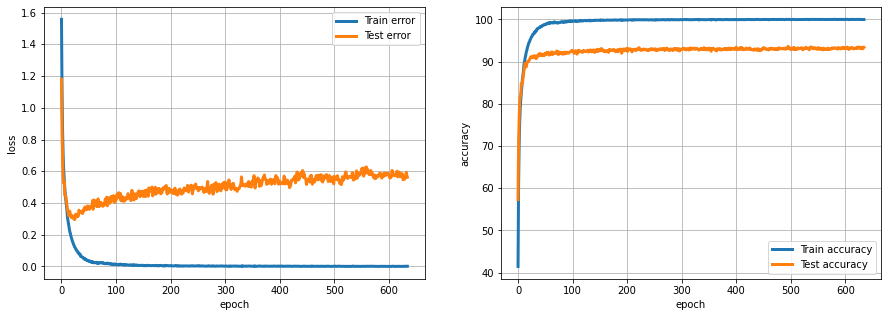

In [13]:
num_epochs = 635

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(num_epochs),train_loss_history,'-',linewidth=3,label='Train error')
plt.plot(range(num_epochs),test_loss_history,'-',linewidth=3,label='Test error')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(num_epochs),train_accuracy_history,'-',linewidth=3,label='Train accuracy')
plt.plot(range(num_epochs),test_accuracy_history,'-',linewidth=3,label='Test accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid(True)
plt.legend()

In [14]:
print('Accuracy:',sum(test_accuracy_history[-5:])/5)

Accuracy: 93.22982594936708
